# **Project Team**


# **Komal pawar**-worked on perceptron training and testing answering related questions
# **Bala Vidyadhar Reddy Talamanchi**-worked on logistic regression training and testing

## Komal pawar Diabetics part-B

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [4]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [5]:
import pandas as pd
import io
dataframe = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
print(dataframe)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


## Data preprocessing

In [6]:
dataframe.shape #Representing the dimensionality of the dataframe

(768, 9)

In [37]:
dataframe.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [7]:
dataframe.describe()#Represents the statistical details of the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataframe.isnull().sum()#Returns the number of null values in the dataframe

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
dataframe.info()#Prints the information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
dataframe.corr()#describes the correlation of the columns in the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


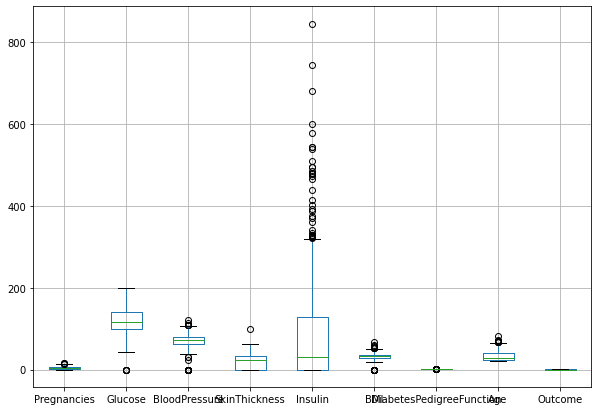

In [12]:
dataframe.boxplot(figsize=(10,7))
plt.show()


In [13]:
X = dataframe.drop('Outcome',axis=1)#dropping the column Outcome
y = dataframe['Outcome']

In [14]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [15]:
X.describe()#describing the statistical information after removing the column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [16]:
X.info()#describing the information of the dataframe after removing the outcome column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [17]:
df_new = X.replace(to_replace=0,value=X.mean())#creating new column replacing it with mean values

In [18]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [46]:
from sklearn.model_selection import train_test_split#splitting the entries in the dataframe


In [47]:
df_new1 = X[X.Insulin != 0]#creating new dataframe

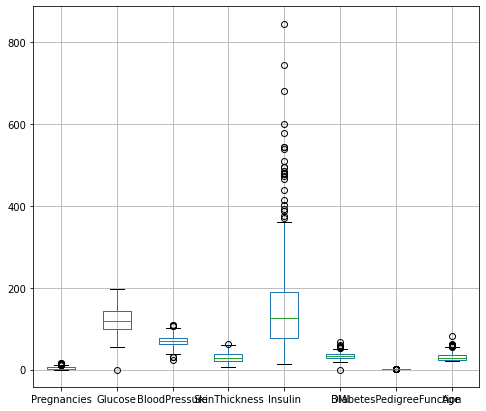

In [48]:
df_new1.boxplot(figsize=(8,7))#visualizing the new dataframe

Using a 70/30 split of each dataset to create separate train and test sets.


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.3, random_state=18)

In [49]:
X_train.shape,X_test.shape#representing the shape of x train and x test data

((537, 8), (231, 8))

In [24]:
y_train

662    1
469    0
203    0
574    0
408    1
      ..
145    0
401    0
343    0
192    1
418    0
Name: Outcome, Length: 537, dtype: int64

Task 1- Implementation

In [50]:
from sklearn.preprocessing import StandardScaler#importing standard scalar to subtract the mean and scale the unit variance
std1=StandardScaler()

In [51]:
X_train_std=std1.fit_transform(X_train)
X_test_std=std1.transform(X_test)

In [52]:
X_train_std


array([[ 1.1835848 ,  1.42298878,  2.87293126, ...,  0.74823759,
        -0.90134647,  0.83001091],
       [ 0.52500077,  1.0064112 ,  0.5132928 , ...,  2.00408409,
         0.27788699, -0.53017481],
       [-0.79216728, -0.7560324 , -0.16088962, ..., -1.79300474,
        -0.69803036, -0.53017481],
       ...,
       [ 0.19570876, -0.01901053,  1.18747522, ...,  0.31977231,
        -0.53828198, -0.02010517],
       [ 0.85429279,  1.16663334, -0.49798083, ..., -0.31553827,
        -0.268162  ,  0.23492966],
       [-1.12145929, -1.26874326, -0.32943523, ..., -2.11804736,
         0.43182633, -0.53017481]])

Model implementation by Multi layer perceptron

In [28]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [53]:
m1 = MLP(hidden_layer_sizes=(200,),
 activation='relu',
 solver='adam',
 alpha=0.001,
 batch_size='auto',
 learning_rate='constant',
 learning_rate_init=0.01,
 max_iter=11)


In [54]:
m1.fit(X_train_std,y_train)
m1.score(X_test_std,y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.6883116883116883

a)For each of the two methods, produce a visualization of the loss function with the number of training epochs. 

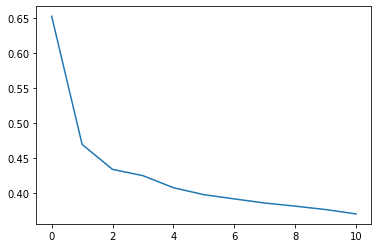

In [55]:
prediction = m1.predict(X_test_std)
accu = accuracy_score(y_test,prediction) * 100
value_loss = m1.loss_curve_
plt.plot(value_loss)
plt.show()

b)Display the value of the coefficient vector at the end of the training process.


In [56]:
m1.coefs_[1]#representing the coefficients


array([[-3.17015751e-02],
       [-7.42565358e-02],
       [-2.83562148e-02],
       [-8.09344722e-02],
       [ 8.55824932e-03],
       [ 6.41302361e-02],
       [-4.14002780e-02],
       [ 4.10676014e-02],
       [-1.63476342e-01],
       [-1.47134416e-01],
       [-9.56969169e-02],
       [ 8.37500831e-02],
       [ 4.66526121e-02],
       [ 3.46953825e-03],
       [ 1.60063125e-01],
       [ 1.11709448e-02],
       [-2.53227599e-02],
       [-2.10612620e-01],
       [-1.93014117e-01],
       [-4.40904691e-02],
       [-1.09032675e-01],
       [ 7.95424574e-02],
       [-3.29280717e-02],
       [ 5.98078692e-02],
       [-2.66132690e-02],
       [ 9.04072295e-02],
       [ 7.28015247e-02],
       [-1.38189721e-01],
       [ 1.42784013e-01],
       [ 4.41238803e-02],
       [-2.27238223e-01],
       [ 1.13177322e-01],
       [-2.38923910e-01],
       [-5.10758001e-02],
       [-5.59905697e-02],
       [-1.10109456e-01],
       [ 3.66731470e-02],
       [-2.38664796e-01],
       [ 1.1

Task 2 Model training

**How did you decide to terminate the training process referred to in Task 1 above?**



I have terminated the training because the accuracy has stopped after certain levels even after adding the parameters like hidden layers ,
learning rate and alpha by seeing certain values.

Task 3 Model Evaluation


What is the classification accuracy achieved on the hold out test set? Display the miss-classification matrix.




              precision    recall  f1-score   support

           0       0.70      0.86      0.77       143
           1       0.64      0.41      0.50        88

    accuracy                           0.69       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.68      0.69      0.67       231



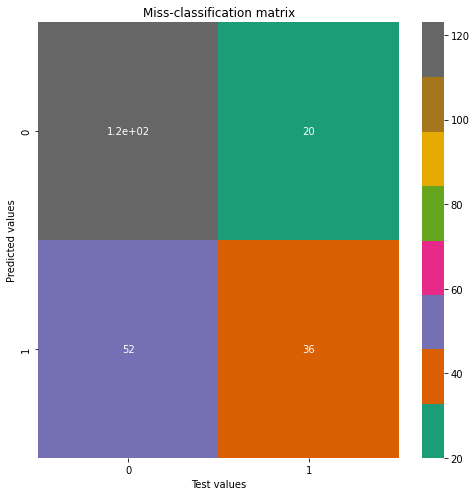

In [57]:
r = classification_report(y_test,prediction)
print(r)
plt.figure(figsize=(7,7))
cf = confusion_matrix(y_test,prediction)
sns.heatmap(cf,annot=True,cmap='Dark2')
plt.xlabel('Test values',fontsize=10)
plt.ylabel('Predicted values',fontsize=10)
plt.title('Miss-classification matrix')
plt.tight_layout()

Task 4 Extending the basic perceptron method (to be done by partner 1)
For the linear perceptron we will employ a divide and conquer method for extension. For each region R currently discovered by the perceptron during training, recursively sub-divide it into two sub-regions R1 and R2 using the same approach you took in Task 1. 


a)What is your stopping criterion to avoid overfitting?


To avoid the overfitting i have used k fold cross validation by using the number of splits as 10. Below it is observed that the training accuracy and testing accuracy is same so i have used the k cross validation to stop.


In [58]:
model_p = Perceptron(max_iter=25,eta0=0.01)
model_p.fit(X_train_std,y_train)
pred_p = model_p.predict(X_test_std)
acc_p = accuracy_score(y_test,pred_p)

In [59]:
cv_t = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model_p, X_train_std, y_train, scoring='accuracy', cv=cv_t, n_jobs=-1)
cv1 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model_p, X_test_std, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print('Training Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('Testing Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Training Accuracy: 0.596 (0.141)
Testing Accuracy: 0.596 (0.141)


b) What is the accuracy of the extended approach on the test
set?

The testing accuracy of the extended approch is 0.596 which is equal to the training accuracy

In [60]:
cv1 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model_p, X_test_std, y_test, scoring='accuracy', cv=cv1, n_jobs=-1)
print('Testing Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Testing Accuracy: 0.596 (0.141)


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [62]:
from google.colab import files
uploaded=files.upload()

Saving german_credit_data.csv to german_credit_data.csv


In [84]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['german_credit_data.csv']))
print(df)

     Age  Sex  Job  Housing  ...  Credit amount  Duration  Purpose  Class
0     67    1    2        1  ...           1169         6        5      1
1     22    0    2        1  ...           5951        48        5      2
2     49    1    1        1  ...           2096        12        3      1
3     45    1    2        0  ...           7882        42        4      1
4     53    1    2        0  ...           4870        24        1      2
..   ...  ...  ...      ...  ...            ...       ...      ...    ...
995   31    0    1        1  ...           1736        12        4      1
996   40    1    3        1  ...           3857        30        1      1
997   38    1    2        1  ...            804        12        5      1
998   23    1    2        0  ...           1845        45        5      2
999   27    1    2        1  ...           4576        45        1      1

[1000 rows x 10 columns]


In [85]:
df2.isnull().sum()#Representing the null values in the dataframe

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Class                 0
dtype: int64

In [86]:
df2['Checking account'].mode()[0]#Checking the non numeric data in the dataframe

'little'

In [87]:
df2['Saving accounts']=df2['Saving accounts'].replace(pd.NA,df2['Saving accounts'].mode()[0])#replacing the na values in the savings account
df2['Checking account']=df2['Checking account'].replace(pd.NA,df2['Checking account'].mode()[0])#replacing the na values in the checking account

In [67]:
label_encoder = LabelEncoder()#To replace the catogerical value in to the numerical value

In [88]:
df2['Sex'] = label_encoder.fit_transform(df2.Sex)
df2['Housing']= label_encoder.fit_transform(df2.Housing)
df2['Saving accounts']=label_encoder.fit_transform(df2['Saving accounts'])
df2['Checking account']=label_encoder.fit_transform(df2['Checking account'])
df2['Purpose']=label_encoder.fit_transform(df2['Purpose'])

In [89]:
X= df2.drop("Class", axis=1)#dropping the class column in the dataframe
y= df2[["Class"]]

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3,random_state=0)

In [92]:
!pip install keras

In [73]:
from keras.models import Sequential#arranging the layers in sequential order
from keras.layers import Dense#refers to the layers inside the neurons connecting to every neuron in the preceding layer

In [93]:
m = Sequential()
m.add(Dense(12, input_dim = 9,activation = 'relu'))
m.add(Dense(9, activation = 'relu'))
m.add(Dense(1, activation = 'sigmoid'))

In [94]:
m.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['Accuracy'])

In [114]:
history=m.fit(X_train, y_train, epochs = 150, verbose =2, batch_size = 10)

Epoch 1/150
70/70 - 0s - loss: -2.5085e+08 - Accuracy: 0.6943 - 184ms/epoch - 3ms/step
Epoch 2/150
70/70 - 0s - loss: -2.5304e+08 - Accuracy: 0.6943 - 217ms/epoch - 3ms/step
Epoch 3/150
70/70 - 0s - loss: -2.5524e+08 - Accuracy: 0.6943 - 199ms/epoch - 3ms/step
Epoch 4/150
70/70 - 0s - loss: -2.5743e+08 - Accuracy: 0.6943 - 197ms/epoch - 3ms/step
Epoch 5/150
70/70 - 0s - loss: -2.5966e+08 - Accuracy: 0.6943 - 189ms/epoch - 3ms/step
Epoch 6/150
70/70 - 0s - loss: -2.6189e+08 - Accuracy: 0.6943 - 200ms/epoch - 3ms/step
Epoch 7/150
70/70 - 0s - loss: -2.6416e+08 - Accuracy: 0.6943 - 173ms/epoch - 2ms/step
Epoch 8/150
70/70 - 0s - loss: -2.6640e+08 - Accuracy: 0.6943 - 148ms/epoch - 2ms/step
Epoch 9/150
70/70 - 0s - loss: -2.6866e+08 - Accuracy: 0.6943 - 203ms/epoch - 3ms/step
Epoch 10/150
70/70 - 0s - loss: -2.7092e+08 - Accuracy: 0.6943 - 190ms/epoch - 3ms/step
Epoch 11/150
70/70 - 0s - loss: -2.7322e+08 - Accuracy: 0.6943 - 177ms/epoch - 3ms/step
Epoch 12/150
70/70 - 0s - loss: -2.7550e+

In [102]:
from sklearn.metrics import accuracy_score#to know the performance of the model

In [103]:
y_pred = m.predict(X_test)
accuracy_score(y_test,y_pred)

0.7133333333333334

In [104]:
from sklearn.metrics import confusion_matrix#define the performance

In [105]:
confusion_matrix(y_test,y_pred)

array([[214,   0],
       [ 86,   0]])

In [110]:
history.history.keys()

dict_keys(['loss', 'Accuracy'])

Text(0, 0.5, 'loss')

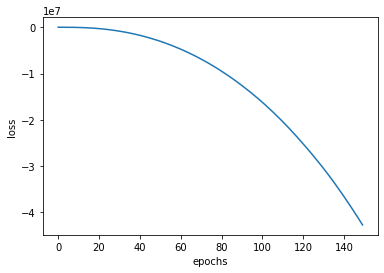

In [112]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'Accuracy')

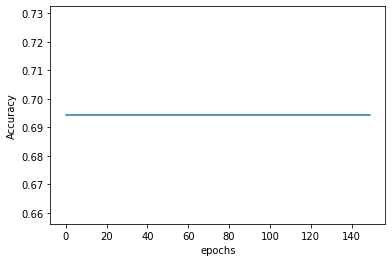

In [113]:
import matplotlib.pyplot as plt
plt.plot(history.history['Accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')